In [1]:
!python --version

Python 3.10.12


# Importando bibliotecas

In [2]:
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-paper')

# Importando dados

In [3]:
caminho = ''

In [4]:
df = pd.read_csv(caminho, sep=';', decimal=',')
df.head(10)

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0
5,Abaiara,CE,0,10496.0,10496.0,0.0,2791.0,1251.0,1540.0,4538.0,...,NaN,NaN,NaN,553.0,1674.0,0.0,NaN,NaN,NaN,1.0
6,Abaíra,BA,0,8316.0,8316.0,0.0,2572.0,1193.0,1379.0,3725.0,...,NaN,NaN,NaN,896.0,696.0,0.0,NaN,NaN,NaN,1.0
7,Abaré,BA,0,17064.0,17064.0,0.0,4332.0,2379.0,1953.0,8994.0,...,0.0,21823314.0,0.0,613.0,1532.0,0.0,NaN,NaN,NaN,1.0
8,Abatiá,PR,0,7764.0,7764.0,0.0,2499.0,1877.0,622.0,5685.0,...,1.0,0.0,45976288.0,2168.0,912.0,0.0,NaN,NaN,NaN,1.0
9,Abdon Batista,SC,0,2653.0,2653.0,0.0,848.0,234.0,614.0,724.0,...,1.0,0.0,42909056.0,976.0,345.0,2.0,NaN,NaN,NaN,1.0


# Tratando dados
---

In [5]:
df.columns = df.columns.str.replace(
    ' ', '_').str.replace('-', '').str.upper().str.strip()
df.columns

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_14', 'IBGE_59', 'IBGE_1014', 'IBGE_1559',
       'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM_RANKING_2010', 'IDHM', 'IDHM_RENDA', 'IDHM_LONGEVIDADE',
       'IDHM_EDUCACAO', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA',
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       '_GVA_TOTAL_', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'PR_AGENCIES',
       'PU_AGENCIES', 'PR_BANK', 'PU_BANK', 'PR_AS

In [6]:
colunas = ['CITY',
           'STATE',
           'CAPITAL',
           'IBGE_RES_POP',
           'AREA',
           'RURAL_URBAN',
           'IDHM',
           'LONG',
           'LAT',
           'ALT',
           'ESTIMATED_POP',
           'GDP',
           'TAXES',
           'GDP_CAPITA',
           'COMP_TOT',
           'MUN_EXPENDIT',
           'GVA_AGROPEC',
           'WHEELED_TRACTOR',
           'IBGE_PLANTED_AREA']

In [7]:
df = df[colunas].copy()
df.head(10)

,CITY,STATE,CAPITAL,IBGE_RES_POP,AREA,RURAL_URBAN,IDHM,LONG,LAT,ALT,ESTIMATED_POP,GDP,TAXES,GDP_CAPITA,COMP_TOT,MUN_EXPENDIT,GVA_AGROPEC,WHEELED_TRACTOR,IBGE_PLANTED_AREA
0,Abadia De Goiás,GO,0,6876.0,147.26,Urbano,0.708,-49.44054783,-16.75881189,893.6,8583.0,166.41,20554.2,20664.57,284.0,28227691.0,6.2,0.0,319.0
1,Abadia Dos Dourados,MG,0,6704.0,881.06,Rural Adjacente,0.69,-47.39683244,-18.48756496,753.12,6972.0,180.09,12873.5,25591.7,476.0,17909274.0,50524.57,0.0,4479.0
2,Abadiânia,GO,0,15757.0,"1,045.13",Rural Adjacente,0.69,-48.71881214,-16.18267186,1017.55,19614.0,287984.49,26822.58,15628.4,288.0,37513019.0,42.84,0.0,10307.0
3,Abaeté,MG,0,22690.0,"1,817.07",Urbano,0.698,-45.44619142,-19.15584769,644.74,23223.0,430235.36,26994.09,18250.42,621.0,NaN,113824.6,0.0,1862.0
4,Abaetetuba,PA,0,141100.0,"1,610.65",Urbano,0.628,-48.88440382,-1.723469863,10.12,156292.0,1249255.29,95180.48,8222.36,931.0,NaN,140463.72,0.0,25200.0
5,Abaiara,CE,0,10496.0,180.08,Rural Adjacente,0.628,-39.04754664,-7.356976596,403.11,11663.0,73151.46,4042.79,6370.41,86.0,NaN,4435.16,0.0,2598.0
6,Abaíra,BA,0,8316.0,538.68,Rural Remoto,0.603,-41.66160848,-13.25353189,674.22,8767.0,64324.59,2019.77,6982.7,191.0,NaN,12.41,0.0,895.0
7,Abaré,BA,0,17064.0,"1,604.92",Rural Remoto,0.575,-39.11658794,-8.723418246,316.38,19814.0,124754.26,6.21,6256.8,87.0,NaN,9176.4,0.0,2058.0
8,Abatiá,PR,0,7764.0,228.72,Rural Adjacente,0.687,-50.31252658,-23.30049404,579.3,7507.0,165048.21,5.77,21173.6,285.0,NaN,73340.52,0.0,1197.0
9,Abdon Batista,SC,0,2653.0,237.16,Rural Adjacente,0.69,-51.02527221,-27.60898712,720.98,2577.0,64742.01,2312.65,24739.02,69.0,19506956.0,24996.75,2.0,5502.0


In [8]:
df.columns

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'AREA', 'RURAL_URBAN',
       'IDHM', 'LONG', 'LAT', 'ALT', 'ESTIMATED_POP', 'GDP', 'TAXES',
       'GDP_CAPITA', 'COMP_TOT', 'MUN_EXPENDIT', 'GVA_AGROPEC',
       'WHEELED_TRACTOR', 'IBGE_PLANTED_AREA'],
      dtype='object')

In [9]:
df.CAPITAL.unique()

array([0, 1])

In [10]:
df.CAPITAL = df.CAPITAL.map({0: 'NÃO', 1: 'SIM'})
df.CAPITAL.unique()

array(['NÃO', 'SIM'], dtype=object)

In [11]:
df.isnull().sum()

CITY                    0
STATE                   0
CAPITAL                 0
IBGE_RES_POP            8
AREA                    3
RURAL_URBAN             3
IDHM                    8
LONG                    9
LAT                     9
ALT                     9
ESTIMATED_POP           3
GDP                     3
TAXES                   3
GDP_CAPITA              3
COMP_TOT                3
MUN_EXPENDIT         1492
GVA_AGROPEC             3
WHEELED_TRACTOR        11
IBGE_PLANTED_AREA       3
dtype: int64

In [12]:
df.MUN_EXPENDIT = df.MUN_EXPENDIT.replace(np.nan, 0)

In [13]:
df.isnull().sum()

CITY                  0
STATE                 0
CAPITAL               0
IBGE_RES_POP          8
AREA                  3
RURAL_URBAN           3
IDHM                  8
LONG                  9
LAT                   9
ALT                   9
ESTIMATED_POP         3
GDP                   3
TAXES                 3
GDP_CAPITA            3
COMP_TOT              3
MUN_EXPENDIT          0
GVA_AGROPEC           3
WHEELED_TRACTOR      11
IBGE_PLANTED_AREA     3
dtype: int64

In [14]:
df = df.dropna(how='any')
df.isnull().sum()

CITY                 0
STATE                0
CAPITAL              0
IBGE_RES_POP         0
AREA                 0
RURAL_URBAN          0
IDHM                 0
LONG                 0
LAT                  0
ALT                  0
ESTIMATED_POP        0
GDP                  0
TAXES                0
GDP_CAPITA           0
COMP_TOT             0
MUN_EXPENDIT         0
GVA_AGROPEC          0
WHEELED_TRACTOR      0
IBGE_PLANTED_AREA    0
dtype: int64

In [15]:
mapa = {'IBGE_RES_POP': 'POPULATION_2010',
        'ESTIMATED_POP': 'POPULATION_2018',
        'IBGE_PLANTED_AREA': 'PLANTED_AREA'}

In [16]:
df = df.rename(columns=mapa)

In [17]:
df.columns

Index(['CITY', 'STATE', 'CAPITAL', 'POPULATION_2010', 'AREA', 'RURAL_URBAN',
       'IDHM', 'LONG', 'LAT', 'ALT', 'POPULATION_2018', 'GDP', 'TAXES',
       'GDP_CAPITA', 'COMP_TOT', 'MUN_EXPENDIT', 'GVA_AGROPEC',
       'WHEELED_TRACTOR', 'PLANTED_AREA'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5554 entries, 0 to 5572
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CITY             5554 non-null   object 
 1   STATE            5554 non-null   object 
 2   CAPITAL          5554 non-null   object 
 3   POPULATION_2010  5554 non-null   float64
 4   AREA             5554 non-null   object 
 5   RURAL_URBAN      5554 non-null   object 
 6   IDHM             5554 non-null   object 
 7   LONG             5554 non-null   object 
 8   LAT              5554 non-null   object 
 9   ALT              5554 non-null   object 
 10  POPULATION_2018  5554 non-null   float64
 11  GDP              5554 non-null   object 
 12  TAXES            5554 non-null   object 
 13  GDP_CAPITA       5554 non-null   object 
 14  COMP_TOT         5554 non-null   float64
 15  MUN_EXPENDIT     5554 non-null   float64
 16  GVA_AGROPEC      5554 non-null   object 
 17  WHEELED_TRACTO

In [19]:
df.AREA.unique()

array(['147.26', '881.06', '1,045.13', ..., '319.06', '2,140.11',
       '190.18'], dtype=object)

In [20]:
df.AREA = df.AREA.str.replace(',', '')
df.AREA.unique()

array(['147.26', '881.06', '1045.13', ..., '319.06', '2140.11', '190.18'],
      dtype=object)

In [21]:
df.AREA = df.AREA.astype(float)
df.IDHM = df.IDHM.astype(float)
df.GDP = df.GDP.astype(float)
df.GDP_CAPITA = df.GDP_CAPITA.astype(float)
df.TAXES = df.TAXES.astype(float)
df.LONG = df.LONG.astype(float)
df.LAT = df.LAT.astype(float)
df.LAT = df.LAT.astype(float)
df.PLANTED_AREA = df.PLANTED_AREA.astype(float)
df.GVA_AGROPEC = df.GVA_AGROPEC.astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5554 entries, 0 to 5572
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CITY             5554 non-null   object 
 1   STATE            5554 non-null   object 
 2   CAPITAL          5554 non-null   object 
 3   POPULATION_2010  5554 non-null   float64
 4   AREA             5554 non-null   float64
 5   RURAL_URBAN      5554 non-null   object 
 6   IDHM             5554 non-null   float64
 7   LONG             5554 non-null   float64
 8   LAT              5554 non-null   float64
 9   ALT              5554 non-null   object 
 10  POPULATION_2018  5554 non-null   float64
 11  GDP              5554 non-null   float64
 12  TAXES            5554 non-null   float64
 13  GDP_CAPITA       5554 non-null   float64
 14  COMP_TOT         5554 non-null   float64
 15  MUN_EXPENDIT     5554 non-null   float64
 16  GVA_AGROPEC      5554 non-null   float64
 17  WHEELED_TRACTO

In [23]:
df.STATE.unique()

array(['GO', 'MG', 'PA', 'CE', 'BA', 'PR', 'SC', 'PE', 'TO', 'MA', 'RN',
       'PI', 'RS', 'MT', 'AC', 'SP', 'ES', 'AL', 'PB', 'MS', 'RO', 'RR',
       'AM', 'AP', 'SE', 'RJ', 'DF'], dtype=object)

In [24]:
NORTE = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']
NORDESTE = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
CENTRO_OESTE = ['DF', 'GO', 'MT', 'MS']
SUDESTE = ['ES', 'MG', 'SP', 'RJ']
SUL = ['PR', 'SC', 'RS']

In [25]:
def estado_para_região(n):
  if n in NORTE:
    return 'NORTE'
  elif n in NORDESTE:
    return 'NORDESTE'
  elif n in CENTRO_OESTE:
    return 'CENTRO OESTE'
  elif n in SUDESTE:
    return 'SUDESTE'
  elif n in SUL:
    return 'SUL'
  else:
    return 'ERROR'

In [26]:
df['REGION'] = df.STATE.apply(estado_para_região)
df.REGION.unique()

array(['CENTRO OESTE', 'SUDESTE', 'NORTE', 'NORDESTE', 'SUL'],
      dtype=object)

In [27]:
df.head(10)

,CITY,STATE,CAPITAL,POPULATION_2010,AREA,RURAL_URBAN,IDHM,LONG,LAT,ALT,POPULATION_2018,GDP,TAXES,GDP_CAPITA,COMP_TOT,MUN_EXPENDIT,GVA_AGROPEC,WHEELED_TRACTOR,PLANTED_AREA,REGION
0,Abadia De Goiás,GO,NÃO,6876.0,147.26,Urbano,0.708,-49.440548,-16.758812,893.6,8583.0,166.41,20554.20,20664.57,284.0,28227691.0,6.20,0.0,319.0,CENTRO OESTE
1,Abadia Dos Dourados,MG,NÃO,6704.0,881.06,Rural Adjacente,0.690,-47.396832,-18.487565,753.12,6972.0,180.09,12873.50,25591.70,476.0,17909274.0,50524.57,0.0,4479.0,SUDESTE
2,Abadiânia,GO,NÃO,15757.0,1045.13,Rural Adjacente,0.690,-48.718812,-16.182672,1017.55,19614.0,287984.49,26822.58,15628.40,288.0,37513019.0,42.84,0.0,10307.0,CENTRO OESTE
3,Abaeté,MG,NÃO,22690.0,1817.07,Urbano,0.698,-45.446191,-19.155848,644.74,23223.0,430235.36,26994.09,18250.42,621.0,0.0,113824.60,0.0,1862.0,SUDESTE
4,Abaetetuba,PA,NÃO,141100.0,1610.65,Urbano,0.628,-48.884404,-1.723470,10.12,156292.0,1249255.29,95180.48,8222.36,931.0,0.0,140463.72,0.0,25200.0,NORTE
5,Abaiara,CE,NÃO,10496.0,180.08,Rural Adjacente,0.628,-39.047547,-7.356977,403.11,11663.0,73151.46,4042.79,6370.41,86.0,0.0,4435.16,0.0,2598.0,NORDESTE
6,Abaíra,BA,NÃO,8316.0,538.68,Rural Remoto,0.603,-41.661608,-13.253532,674.22,8767.0,64324.59,2019.77,6982.70,191.0,0.0,12.41,0.0,895.0,NORDESTE
7,Abaré,BA,NÃO,17064.0,1604.92,Rural Remoto,0.575,-39.116588,-8.723418,316.38,19814.0,124754.26,6.21,6256.80,87.0,0.0,9176.40,0.0,2058.0,NORDESTE
8,Abatiá,PR,NÃO,7764.0,228.72,Rural Adjacente,0.687,-50.312527,-23.300494,579.3,7507.0,165048.21,5.77,21173.60,285.0,0.0,73340.52,0.0,1197.0,SUL
9,Abdon Batista,SC,NÃO,2653.0,237.16,Rural Adjacente,0.690,-51.025272,-27.608987,720.98,2577.0,64742.01,2312.65,24739.02,69.0,19506956.0,24996.75,2.0,5502.0,SUL


# 1. Escolhendo o plot apropriado para visualizar a proporção entre a participação de cada valor único da coluna RURAL_URBAN para composição do valor total da coluna AREA
---

In [28]:
df.RURAL_URBAN.unique()

array(['Urbano', 'Rural Adjacente', 'Rural Remoto',
       'Intermediário Adjacente', 'Intermediário Remoto'], dtype=object)

In [29]:
df.AREA.unique()

array([ 147.26,  881.06, 1045.13, ...,  319.06, 2140.11,  190.18])

In [30]:
área_por_categoria = df.groupby('RURAL_URBAN')['AREA'].sum()
área_por_categoria

RURAL_URBAN
Intermediário Adjacente     724915.58
Intermediário Remoto       1075363.91
Rural Adjacente            2349958.04
Rural Remoto               1843091.37
Urbano                     2430410.56
Name: AREA, dtype: float64

In [31]:
proporção = área_por_categoria / área_por_categoria.sum()
proporção

RURAL_URBAN
Intermediário Adjacente    0.086056
Intermediário Remoto       0.127659
Rural Adjacente            0.278969
Rural Remoto               0.218797
Urbano                     0.288519
Name: AREA, dtype: float64

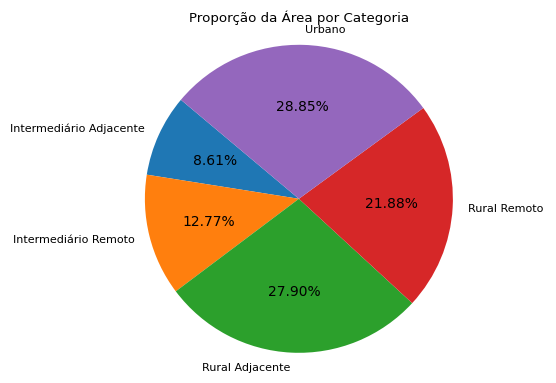

In [32]:
plt.figure()
plt.pie(proporção.values, labels=área_por_categoria.index,
        autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.title('Proporção da Área por Categoria')
plt.show()

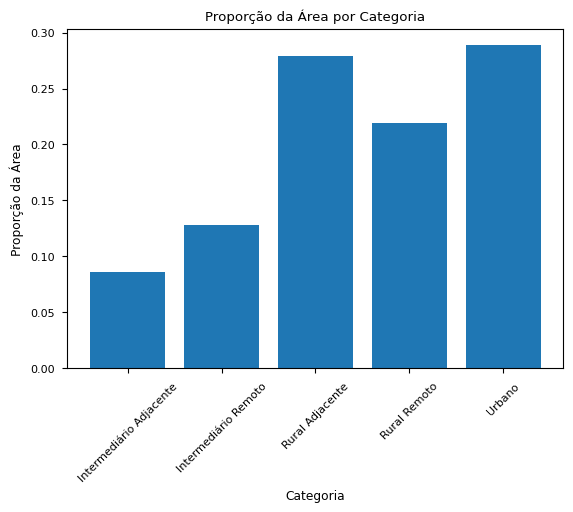

In [33]:
plt.figure()
plt.bar(área_por_categoria.index, proporção.values)
plt.xlabel('Categoria')
plt.ylabel('Proporção da Área')
plt.title('Proporção da Área por Categoria')
plt.xticks(rotation=45)
plt.show()

# 2. Escolhendo o plot apropriado para visualizar a correlação entre as colunas POPULATION_2010, POPULATION-2018 e GDP
---

In [34]:
df.POPULATION_2010.unique()

array([ 6876.,  6704., 15757., ..., 45536.,  2075., 50173.])

In [35]:
df.POPULATION_2018.unique()

array([ 8583.,  6972., 19614., ...,  2225.,  2684., 51471.])

In [36]:
df.GDP.unique()

array([1.6641000e+02, 1.8009000e+02, 2.8798449e+05, ..., 7.5934890e+04,
       3.8050930e+05, 6.6998290e+04])

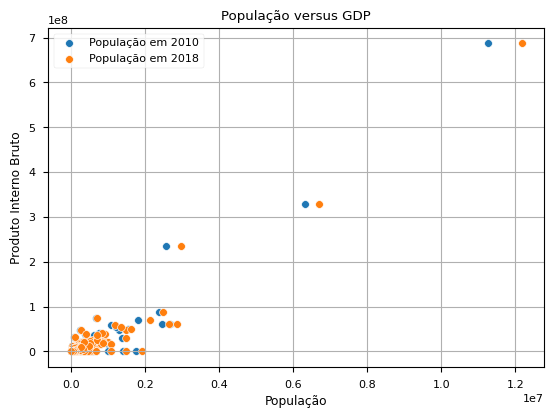

In [37]:
plt.figure()
sns.scatterplot(data=df, x=df.POPULATION_2010,
                y=df.GDP, label='População em 2010')
sns.scatterplot(data=df, x=df.POPULATION_2018,
                y=df.GDP, label='População em 2018')
plt.xlabel('População')
plt.ylabel('Produto Interno Bruto')
plt.title('População versus GDP')
plt.legend()
plt.grid(True)
plt.show()

# 3. Escolhendo o plot apropriado para visualizar a comparação entre as colunas GDP de acordo com cada região (coluna STATE)
---

In [38]:
df.GDP.unique()

array([1.6641000e+02, 1.8009000e+02, 2.8798449e+05, ..., 7.5934890e+04,
       3.8050930e+05, 6.6998290e+04])

In [39]:
df.STATE.unique()

array(['GO', 'MG', 'PA', 'CE', 'BA', 'PR', 'SC', 'PE', 'TO', 'MA', 'RN',
       'PI', 'RS', 'MT', 'AC', 'SP', 'ES', 'AL', 'PB', 'MS', 'RO', 'RR',
       'AM', 'AP', 'SE', 'RJ', 'DF'], dtype=object)

In [40]:
gdp_por_estado = df.groupby('STATE')['GDP'].mean()
gdp_por_estado

STATE
AC    2.162279e+05
AL    4.456152e+05
AM    1.382052e+06
AP    8.765902e+05
BA    5.803116e+05
CE    7.154851e+05
DF    2.354971e+08
ES    1.278811e+06
GO    6.425981e+05
MA    1.781032e+05
MG    5.320024e+05
MS    1.007733e+06
MT    6.878672e+05
PA    8.384405e+05
PB    2.464789e+05
PE    7.921692e+05
PI    1.717668e+05
PR    6.736574e+05
RJ    6.682954e+06
RN    3.375725e+05
RO    4.068474e+05
RR    1.284430e+05
RS    5.785027e+05
SC    6.966244e+05
SE    4.579639e+05
SP    2.737559e+06
TO    1.527542e+05
Name: GDP, dtype: float64

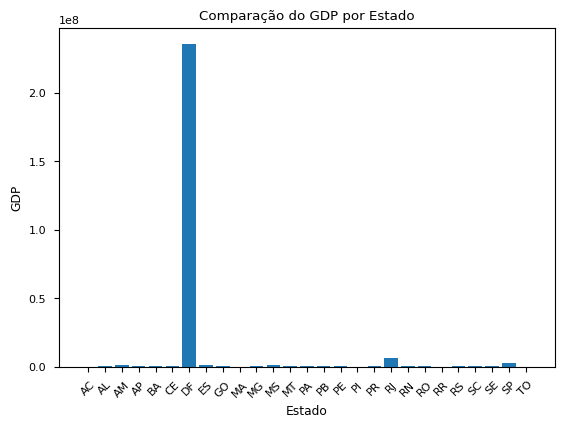

In [41]:
plt.figure()
plt.bar(gdp_por_estado.index, gdp_por_estado.values)
plt.xlabel('Estado')
plt.ylabel('GDP')
plt.title('Comparação do GDP por Estado')
plt.xticks(rotation=45)
plt.show()

In [42]:
gdp_por_estado = df[df.STATE != 'DF'].groupby('STATE')['GDP'].mean()
gdp_por_estado

STATE
AC    2.162279e+05
AL    4.456152e+05
AM    1.382052e+06
AP    8.765902e+05
BA    5.803116e+05
CE    7.154851e+05
ES    1.278811e+06
GO    6.425981e+05
MA    1.781032e+05
MG    5.320024e+05
MS    1.007733e+06
MT    6.878672e+05
PA    8.384405e+05
PB    2.464789e+05
PE    7.921692e+05
PI    1.717668e+05
PR    6.736574e+05
RJ    6.682954e+06
RN    3.375725e+05
RO    4.068474e+05
RR    1.284430e+05
RS    5.785027e+05
SC    6.966244e+05
SE    4.579639e+05
SP    2.737559e+06
TO    1.527542e+05
Name: GDP, dtype: float64

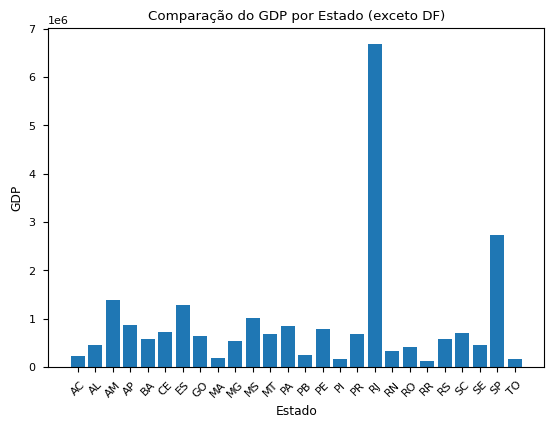

In [43]:
plt.figure()
plt.bar(gdp_por_estado.index, gdp_por_estado.values)
plt.xlabel('Estado')
plt.ylabel('GDP')
plt.title('Comparação do GDP por Estado (exceto DF)')
plt.xticks(rotation=45)
plt.show()

# 4. Escolhendo o plot apropriado para visualizar a distribuição dos municipios (coluna CITY) de acordo apenas com latitude (coluna LAT) e longitude (coluna LONG)
---

In [44]:
df.CITY.unique()

array(['Abadia De Goiás', 'Abadia Dos Dourados', 'Abadiânia', ...,
       'Zacarias', 'Zé Doca', 'Zortéa'], dtype=object)

In [45]:
df.LAT.unique()

array([-16.75881189, -18.48756496, -16.18267186, ..., -21.05011043,
        -3.2754805 , -27.45025141])

In [46]:
df.LONG.unique()

array([-49.44054783, -47.39683244, -48.71881214, ..., -50.05573952,
       -45.65769786, -51.54956631])

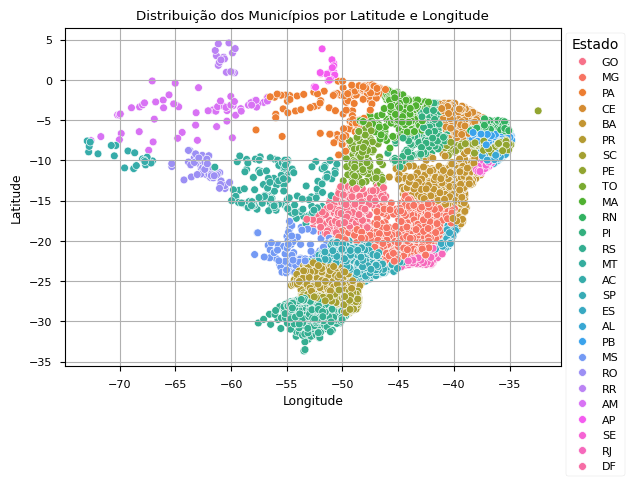

In [47]:
plt.figure()
sns.scatterplot(x=df.LONG, y=df.LAT, hue=df.STATE, data=df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição dos Municípios por Latitude e Longitude')
plt.legend(title='Estado', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# 5. Escolhendo o plot apropriado para visualizar as palavras (e sua quantidade de ocorrências) presentes na coluna STATE
---

In [48]:
df.STATE.unique()

array(['GO', 'MG', 'PA', 'CE', 'BA', 'PR', 'SC', 'PE', 'TO', 'MA', 'RN',
       'PI', 'RS', 'MT', 'AC', 'SP', 'ES', 'AL', 'PB', 'MS', 'RO', 'RR',
       'AM', 'AP', 'SE', 'RJ', 'DF'], dtype=object)

In [49]:
state_counts = df.STATE.value_counts()
state_counts

MG    852
SP    645
RS    495
BA    416
PR    398
SC    293
GO    245
PI    224
PB    222
MA    217
PE    185
CE    184
RN    164
PA    143
MT    141
TO    138
AL    102
RJ     92
ES     78
MS     78
SE     75
AM     61
RO     52
AC     22
AP     16
RR     15
DF      1
Name: STATE, dtype: int64

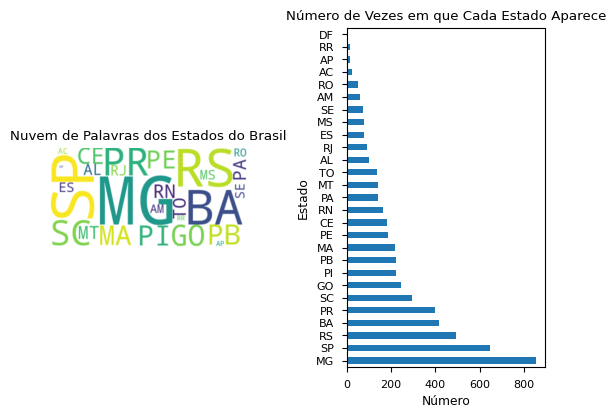

In [50]:
wordcloud = WordCloud(
    background_color='white').generate_from_frequencies(state_counts)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras dos Estados do Brasil')
plt.axis('off')

plt.subplot(1, 2, 2)
state_counts.plot(kind='barh')
plt.title('Número de Vezes em que Cada Estado Aparece')
plt.xlabel('Número')
plt.ylabel('Estado')

plt.subplots_adjust(wspace=0.5)
plt.show()